In [1]:
import plotters 
import h5py
import os
import numpy as np 
import sys 
sys.path.append("../code/")
import path_handler as PH #type: ignore
import StreamOrbitCoords as SOC
import data_extractors as DE #type: ignore

In [2]:
GCname="Pal5"
montecarlokey="monte-carlo-000"
potential="pouliasis2017pii-GCNBody"
NP=int(1e5)

In [3]:
plottype="xy-tail"
outpathname=PH.base['manyplots'] + plottype+"/"+potential+"/"+GCname+"/"
os.makedirs(outpathname,exist_ok=True)
outname = GCname+"-"+montecarlokey+"-"+potential+"-"+str(NP)+"-"+plottype+".png"

In [4]:
streamfilename=PH.stream(GCname,montecarlokey,potential,NP)
stream=h5py.File(streamfilename,'r')

In [5]:
xs=stream['isotropic-plummer'][str(NP)][montecarlokey]['x'][:]
ys=stream['isotropic-plummer'][str(NP)][montecarlokey]['y'][:]
zs=stream['isotropic-plummer'][str(NP)][montecarlokey]['z'][:]
vxs=stream['isotropic-plummer'][str(NP)][montecarlokey]['vx'][:]
vys=stream['isotropic-plummer'][str(NP)][montecarlokey]['vy'][:]
vzs=stream['isotropic-plummer'][str(NP)][montecarlokey]['vz'][:]

In [6]:
time_of_interest = 0 
n_dynamic_time = 2
pathOrbit=PH.orbit(GCname,potential)
thost,xhost,yhost,zhost,vxhost,vyhost,vzhost=DE.get_orbit(pathOrbit,montecarlokey)
TORB, XORB, YORB, ZORB, VXORB, VYORB, VZORB=DE.filter_orbit_by_dynamical_time(thost,(xhost,yhost,zhost,vxhost,vyhost,vzhost),time_of_interest,n_dynamic_time)

In [7]:
xprimeP,yprimeP,zprimeP,vxprimeP,vyprimeP,vzprimeP,indexes=SOC.transform_from_galactico_centric_to_tail_coordinates(xs,ys,zs,vxs,vys,vzs,TORB,XORB,YORB,ZORB,VXORB,VYORB,VZORB,t0=time_of_interest)

In [8]:
xmax,ymax = 12,0.5
xedges,yedges=plotters.histogramEdges(NP,xmax,ymax)
X,Y,H=plotters.getHistogram2d(xprimeP,yprimeP,xedges,yedges)
H=H/NP

In [9]:
myaxis={"xlim":[-xmax,xmax],"ylim":[-ymax,ymax],"xlabel":"$x'$ [kpc]","ylabel":"$y'$ [kpc]"}

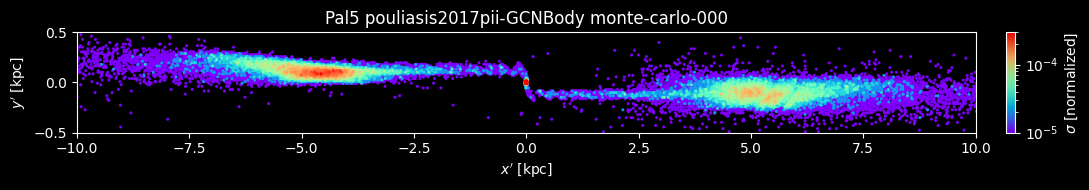

In [11]:
from matplotlib import colors
scat_params = {"alpha":0.9, "s":1.5, "cmap":'rainbow', "norm":colors.LogNorm(vmin=1e-5, vmax=3e-4)}
fig,axis,im,cbar=plotters.plot2dHist(X,Y,H,scat_params=scat_params)
title="{:s} {:s} {:s}".format(GCname, potential, montecarlokey)
axis[0].set_title(title)    
fig.tight_layout()
fig.savefig(outpathname+outname,dpi=300)

In [20]:
plottype="xy-tail"
outpathname=PH.base['manyplots'] + plottype+"/"+potential+"/"+GCname+"/"
outname = GCname+"-"+montecarlokey+"-"+potential+"-"+str(NP)+"-"+plottype+".png"


'Pal5-monte-carlo-000-pouliasis2017pii-GCNBody-100000-xy-tail.png'